## Setup

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_CSV = '/home/jovyan/data/export_spout_test.csv'
FASTA_PATCHES = '/home/jovyan/data/patches_test.fasta'
FASTA_CORES = '/home/jovyan/data/cores_test.fasta'

# DATA_CSV = '/home/jovyan/data/export_spout_train.csv'
# FASTA_PATCHES = '/home/jovyan/data/patches_train.fasta'
# FASTA_CORES = '/home/jovyan/data/cores_train.fasta'

# DATA_CSV = '/home/jovyan/data/export_knotprot.csv'
# FASTA_PATCHES = '/home/jovyan/data/patches_knotprot.fasta'
# FASTA_CORES = '/home/jovyan/data/cores_knotprot.fasta'

CSV_DELIMETER = ','
PATCH_SIZES = [10, 50, 80, 200]

## Load data:

In [3]:
with open(DATA_CSV, newline='') as f:
    reader = csv.reader(f, delimiter=CSV_DELIMETER)
    data = list(reader)

data[0]

['seq',
 'patch_10_preds',
 'patch_10_min_pos_start',
 'patch_10_min_pos_end',
 'patch_10_min_pred',
 'patch_50_preds',
 'patch_50_min_pos_start',
 'patch_50_min_pos_end',
 'patch_50_min_pred',
 'patch_80_preds',
 'patch_80_min_pos_start',
 'patch_80_min_pos_end',
 'patch_80_min_pred',
 'patch_200_preds',
 'patch_200_min_pos_start',
 'patch_200_min_pos_end',
 'patch_200_min_pred',
 'real_start',
 'real_end',
 'patch_10_min_overlap_pred',
 'patch_10_min_overlap_real',
 'patch_10_overlap',
 'patch_50_min_overlap_pred',
 'patch_50_min_overlap_real',
 'patch_50_overlap',
 'patch_80_min_overlap_pred',
 'patch_80_min_overlap_real',
 'patch_80_overlap',
 'patch_200_min_overlap_pred',
 'patch_200_min_overlap_real',
 'patch_200_overlap']

In [4]:
scores_df = pd.DataFrame(data[1:], columns=data[0])
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,...,patch_10_overlap,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap
0,MEIIDQWAGIGIIRGEEISKKKIGKRDSREITNKISLVQLIYEAED...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",61.0,111.0,0.999997615814209,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,-0.7388888888888889,0.0,0.0,-0.18487394957983194,0.2375,0.40425531914893614,0.17592592592592593,0.235,1.0,0.235
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",48.0,58.0,1.5744457820821012e-11,"[1.0, 0.9999921321868896, 0.6891674399375916, ...",53.0,103.0,2.9218185204626934e-08,"[1.0, 0.4102887511253357, 0.26286399364471436,...",...,0.20408163265306123,0.32,0.32653061224489793,0.1927710843373494,0.2,0.32653061224489793,0.1415929203539823,0.08,0.32653061224489793,0.06866952789699571
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",124.0,134.0,0.0219490732997655,"[1.0, 0.9999712705612183, 0.9999939203262329, ...",105.0,155.0,0.0112468404695391,"[1.0, 0.9999544620513916, 0.9999614953994751, ...",...,0.21739130434782608,0.88,0.9565217391304348,0.8461538461538461,0.1875,0.32608695652173914,0.13513513513513514,0.075,0.32608695652173914,0.06493506493506493
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",136.0,146.0,0.2623575031757355,"[1.0, 0.998554527759552, 0.9983088970184326, 0...",140.0,190.0,0.4346773028373718,"[1.0, 0.9997557997703552, 0.999578058719635, 0...",...,0.20833333333333334,0.36,0.375,0.225,0.225,0.375,0.16363636363636364,0.24,1.0,0.24
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",137.0,147.0,0.0121569586917757,"[1.0, 0.9982252717018127, 0.9954041242599487, ...",91.0,141.0,0.2177656441926956,"[1.0, 0.9984519481658936, 0.9937133193016052, ...",...,0.2127659574468085,0.64,0.6808510638297872,0.49230769230769234,0.2375,0.40425531914893614,0.17592592592592593,0.235,1.0,0.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",78.0,88.0,5.396022243076004e-05,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",31.0,81.0,1.1062618909818413e-07,"[1.0, 0.0004085551481693983, 1.60088839038508e...",...,0.21739130434782608,0.7,0.7608695652173914,0.5737704918032787,0.55,0.9565217391304348,0.5365853658536586,0.22,0.9565217391304348,0.21782178217821782
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",139.0,149.0,0.0457930453121662,"[1.0, 0.999996542930603, 0.999998927116394, 0....",117.0,167.0,0.0254829991608858,"[1.0, 0.9999997615814209, 0.9999997615814209, ...",...,0.2127659574468085,0.86,0.9148936170212766,0.7962962962962963,0.5875,1.0,0.5875,0.235,1.0,0.235
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,"[0.9999994039535522, 0.999998927116394, 0.9999...",195.0,205.0,0.6551317572593689,"[0.9999994039535522, 0.9999974966049194, 0.999...",155.0,205.0,0.6165779232978821,"[0.9999994039535522, 0.9999990463256836, 0.999...",...,-0.5365853658536586,0.0,0.0,-0.4049079754601227,0.075,0.1276595744680851,0.049586776859504134,0.235,1.0,0.235
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",141.0,151.0,0.999963879585266,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999...",141.0,191.0,0.0351641401648521,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.23809523809523808,0.32,0.38095238095238093,0.21052631578947367

In [5]:
for patch_size in PATCH_SIZES:
    scores_df[f'patch_{patch_size}_min_pos_start'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_start'])
    scores_df[f'patch_{patch_size}_min_pos_end'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_end'])
    scores_df[f'patch_{patch_size}_min_pred'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pred'])
    scores_df[f'patch_{patch_size}_min_overlap_pred'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_overlap_pred'])
    scores_df[f'patch_{patch_size}_min_overlap_real'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_overlap_real'])
    scores_df[f'patch_{patch_size}_overlap'] = pd.to_numeric(scores_df[f'patch_{patch_size}_overlap'])
scores_df['real_start'] = pd.to_numeric(scores_df['real_start'])
scores_df['real_end'] = pd.to_numeric(scores_df['real_end'])
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,...,patch_10_overlap,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap
0,MEIIDQWAGIGIIRGEEISKKKIGKRDSREITNKISLVQLIYEAED...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.000000e+00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",61.0,111.0,9.999976e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,-0.738889,0.00,0.000000,-0.184874,0.2375,0.404255,0.175926,0.235,1.000000,0.235000
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",48.0,58.0,1.574446e-11,"[1.0, 0.9999921321868896, 0.6891674399375916, ...",53.0,103.0,2.921819e-08,"[1.0, 0.4102887511253357, 0.26286399364471436,...",...,0.204082,0.32,0.326531,0.192771,0.2000,0.326531,0.141593,0.080,0.326531,0.068670
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",124.0,134.0,2.194907e-02,"[1.0, 0.9999712705612183, 0.9999939203262329, ...",105.0,155.0,1.124684e-02,"[1.0, 0.9999544620513916, 0.9999614953994751, ...",...,0.217391,0.88,0.956522,0.846154,0.1875,0.326087,0.135135,0.075,0.326087,0.064935
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",136.0,146.0,2.623575e-01,"[1.0, 0.998554527759552, 0.9983088970184326, 0...",140.0,190.0,4.346773e-01,"[1.0, 0.9997557997703552, 0.999578058719635, 0...",...,0.208333,0.36,0.375000,0.225000,0.2250,0.375000,0.163636,0.240,1.000000,0.240000
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",137.0,147.0,1.215696e-02,"[1.0, 0.9982252717018127, 0.9954041242599487, ...",91.0,141.0,2.177656e-01,"[1.0, 0.9984519481658936, 0.9937133193016052, ...",...,0.212766,0.64,0.680851,0.492308,0.2375,0.404255,0.175926,0.235,1.000000,0.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",78.0,88.0,5.396022e-05,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",31.0,81.0,1.106262e-07,"[1.0, 0.0004085551481693983, 1.60088839038508e...",...,0.217391,0.70,0.760870,0.573770,0.5500,0.956522,0.536585,0.220,0.956522,0.217822
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",139.0,149.0,4.579305e-02,"[1.0, 0.999996542930603, 0.999998927116394, 0....",117.0,167.0,2.548300e-02,"[1.0, 0.9999997615814209, 0.9999997615814209, ...",...,0.212766,0.86,0.914894,0.796296,0.5875,1.000000,0.587500,0.235,1.000000,0.235000
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,"[0.9999994039535522, 0.999998927116394, 0.9999...",195.0,205.0,6.551318e-01,"[0.9999994039535522, 0.9999974966049194, 0.999...",155.0,205.0,6.165779e-01,"[0.9999994039535522, 0.9999990463256836, 0.999...",...,-0.536585,0.00,0.000000,-0.404908,0.0750,0.127660,0.049587,0.235,1.000000,0.235000
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",141.0,151.0,9.999639e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999...",141.0,191.0,3.516414e-02,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.238095,0.32,0.380952,0.210526,0.2000,0.380952,0.150943,0.210,1.000000,0.210000


Focus only on those sequences, where the prediction score dropped below 0.5:

In [6]:
PREDICTION_THRESHOLD = 0.5

scores_df['drop'] = scores_df.apply(lambda row: 1 if row['patch_10_min_pred'] < PREDICTION_THRESHOLD else 0, axis = 1)
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,...,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap,drop
0,MEIIDQWAGIGIIRGEEISKKKIGKRDSREITNKISLVQLIYEAED...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,1.000000e+00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",61.0,111.0,9.999976e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.00,0.000000,-0.184874,0.2375,0.404255,0.175926,0.235,1.000000,0.235000,0
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",48.0,58.0,1.574446e-11,"[1.0, 0.9999921321868896, 0.6891674399375916, ...",53.0,103.0,2.921819e-08,"[1.0, 0.4102887511253357, 0.26286399364471436,...",...,0.32,0.326531,0.192771,0.2000,0.326531,0.141593,0.080,0.326531,0.068670,1
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",124.0,134.0,2.194907e-02,"[1.0, 0.9999712705612183, 0.9999939203262329, ...",105.0,155.0,1.124684e-02,"[1.0, 0.9999544620513916, 0.9999614953994751, ...",...,0.88,0.956522,0.846154,0.1875,0.326087,0.135135,0.075,0.326087,0.064935,1
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",136.0,146.0,2.623575e-01,"[1.0, 0.998554527759552, 0.9983088970184326, 0...",140.0,190.0,4.346773e-01,"[1.0, 0.9997557997703552, 0.999578058719635, 0...",...,0.36,0.375000,0.225000,0.2250,0.375000,0.163636,0.240,1.000000,0.240000,1
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",137.0,147.0,1.215696e-02,"[1.0, 0.9982252717018127, 0.9954041242599487, ...",91.0,141.0,2.177656e-01,"[1.0, 0.9984519481658936, 0.9937133193016052, ...",...,0.64,0.680851,0.492308,0.2375,0.404255,0.175926,0.235,1.000000,0.235000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",78.0,88.0,5.396022e-05,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",31.0,81.0,1.106262e-07,"[1.0, 0.0004085551481693983, 1.60088839038508e...",...,0.70,0.760870,0.573770,0.5500,0.956522,0.536585,0.220,0.956522,0.217822,1
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",139.0,149.0,4.579305e-02,"[1.0, 0.999996542930603, 0.999998927116394, 0....",117.0,167.0,2.548300e-02,"[1.0, 0.9999997615814209, 0.9999997615814209, ...",...,0.86,0.914894,0.796296,0.5875,1.000000,0.587500,0.235,1.000000,0.235000,1
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,"[0.9999994039535522, 0.999998927116394, 0.9999...",195.0,205.0,6.551318e-01,"[0.9999994039535522, 0.9999974966049194, 0.999...",155.0,205.0,6.165779e-01,"[0.9999994039535522, 0.9999990463256836, 0.999...",...,0.00,0.000000,-0.404908,0.0750,0.127660,0.049587,0.235,1.000000,0.235000,0
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",141.0,151.0,9.999639e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999...",141.0,191.0,3.516414e-02,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.32,0.380952,0.210526,0.2000,0.380952,0.150943,0.210,1.000000,0.210000,0


In [7]:
df_reduced = scores_df[['seq', 'patch_10_min_pos_start', 'patch_10_min_pos_end', 'patch_10_min_pred', 'patch_10_min_overlap_pred', 'real_start', 'real_end', 'drop']].copy()
df_reduced.rename(columns = {'seq': 'sequence'}, inplace = True)
df_reduced

,sequence,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_10_min_overlap_pred,real_start,real_end,drop
0,MEIIDQWAGIGIIRGEEISKKKIGKRDSREITNKISLVQLIYEAED...,0.0,0.0,1.000000e+00,0.0,133.0,180.0,0
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,48.0,58.0,1.574446e-11,1.0,20.0,69.0,1
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,124.0,134.0,2.194907e-02,1.0,103.0,149.0,1
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,136.0,146.0,2.623575e-01,1.0,110.0,158.0,1
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,137.0,147.0,1.215696e-02,1.0,109.0,156.0,1
...,...,...,...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,78.0,88.0,5.396022e-05,1.0,46.0,92.0,1
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,139.0,149.0,4.579305e-02,1.0,113.0,160.0,1
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,195.0,205.0,6.551318e-01,0.0,271.0,318.0,0
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,141.0,151.0,9.999639e-01,1.0,115.0,157.0,0


In [8]:
df_reduced['patch'] = df_reduced.apply(lambda row: row['sequence'][int(row['patch_10_min_pos_start']):int(row['patch_10_min_pos_end'])], axis = 1)
df_reduced['real_knot_core'] = df_reduced.apply(lambda row: row['sequence'][int(row['real_start']):int(row['real_end'])], axis = 1)
df_reduced['patch_in_core'] = df_reduced.apply(lambda row: 1 if row['patch'] in row['real_knot_core'] else 0, axis = 1)
df_reduced = df_reduced.loc[df_reduced['patch'] != '']

In [9]:
df_reduced

,sequence,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_10_min_overlap_pred,real_start,real_end,drop,patch,real_knot_core,patch_in_core
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,48.0,58.0,1.574446e-11,1.0,20.0,69.0,1,LCLIFGTGWG,WIATSARRYPNTLSFSNLTKIISEDAPPLCLIFGTGWGIHPELLLDMDH,1
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,124.0,134.0,2.194907e-02,1.0,103.0,149.0,1,NKASHVLVFG,ATSAKKTVGSITTETLRLKLENKASHVLVFGTAWGLADELIDTCDF,1
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,136.0,146.0,2.623575e-01,1.0,110.0,158.0,1,YLLLFGTGWG,ATDARVYPNTIEYSRLKEEVFKSDRVYLLLFGTGWGMEQSLMEQCDYI,1
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,137.0,147.0,1.215696e-02,1.0,109.0,156.0,1,LFGTGWGLAD,ATTGREFPNQVDYDFFRKELPERLPVLILFGTGWGLADELILSSHVI,1
5,MVTPLSDQKELVKKIVSHWLEGTGATYNPKRKEALKLIVVKNSLNE...,96.0,106.0,5.866068e-14,1.0,62.0,109.0,1,GLSENFMAEA,VTSAGRSSRNISFKRFHEMLQDGSLYLLILGTGWGLSENFMAEADYV,1
...,...,...,...,...,...,...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,78.0,88.0,5.396022e-05,1.0,46.0,92.0,1,GYGLAEETLS,GTSARERGLKKITEADVRRIQKQRPVLILFGTGYGLAEETLSFCEA,1
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,139.0,149.0,4.579305e-02,1.0,113.0,160.0,1,LLLFGTGWGL,ATGASQFPNSVDFPRLREKIGGGDPILLLFGTGWGLEKSILTEADYV,1
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,195.0,205.0,6.551318e-01,0.0,271.0,318.0,0,GRAAQAFEVK,ITDPKGPTLAEVKDKLARDLHYAKEVVVFIGSREGIPKGLFRFADYV,0
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,141.0,151.0,9.999639e-01,1.0,115.0,157.0,0,EKWGVSAEAA,AAHLSETAVDYRTVDYTAPTCVLLGAEKWGVSAEAAEGADAH,1


In [10]:
df_reduced['position_in_core'] = df_reduced.apply(lambda row: row['patch_10_min_pos_start'] - row['real_start'], axis = 1)
df_reduced

/tmp/ipykernel_4571/4282860939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['position_in_core'] = df_reduced.apply(lambda row: row['patch_10_min_pos_start'] - row['real_start'], axis = 1)


,sequence,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_10_min_overlap_pred,real_start,real_end,drop,patch,real_knot_core,patch_in_core,position_in_core
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,48.0,58.0,1.574446e-11,1.0,20.0,69.0,1,LCLIFGTGWG,WIATSARRYPNTLSFSNLTKIISEDAPPLCLIFGTGWGIHPELLLDMDH,1,28.0
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,124.0,134.0,2.194907e-02,1.0,103.0,149.0,1,NKASHVLVFG,ATSAKKTVGSITTETLRLKLENKASHVLVFGTAWGLADELIDTCDF,1,21.0
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,136.0,146.0,2.623575e-01,1.0,110.0,158.0,1,YLLLFGTGWG,ATDARVYPNTIEYSRLKEEVFKSDRVYLLLFGTGWGMEQSLMEQCDYI,1,26.0
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,137.0,147.0,1.215696e-02,1.0,109.0,156.0,1,LFGTGWGLAD,ATTGREFPNQVDYDFFRKELPERLPVLILFGTGWGLADELILSSHVI,1,28.0
5,MVTPLSDQKELVKKIVSHWLEGTGATYNPKRKEALKLIVVKNSLNE...,96.0,106.0,5.866068e-14,1.0,62.0,109.0,1,GLSENFMAEA,VTSAGRSSRNISFKRFHEMLQDGSLYLLILGTGWGLSENFMAEADYV,1,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,78.0,88.0,5.396022e-05,1.0,46.0,92.0,1,GYGLAEETLS,GTSARERGLKKITEADVRRIQKQRPVLILFGTGYGLAEETLSFCEA,1,32.0
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,139.0,149.0,4.579305e-02,1.0,113.0,160.0,1,LLLFGTGWGL,ATGASQFPNSVDFPRLREKIGGGDPILLLFGTGWGLEKSILTEADYV,1,26.0
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,195.0,205.0,6.551318e-01,0.0,271.0,318.0,0,GRAAQAFEVK,ITDPKGPTLAEVKDKLARDLHYAKEVVVFIGSREGIPKGLFRFADYV,0,-76.0
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,141.0,151.0,9.999639e-01,1.0,115.0,157.0,0,EKWGVSAEAA,AAHLSETAVDYRTVDYTAPTCVLLGAEKWGVSAEAAEGADAH,1,26.0


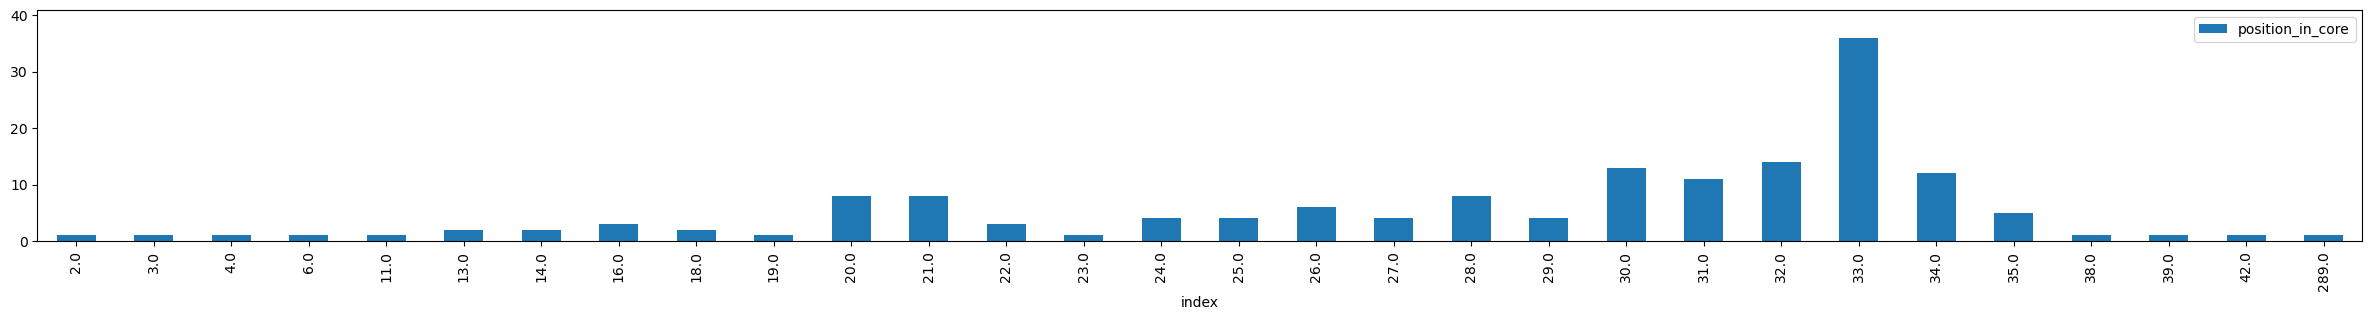

In [11]:
def plot_df(plt_size_x, plt_size_y, df, column_name, y_scale):
    plt.rcParams['figure.figsize'] = (plt_size_x, plt_size_y)
    ax = df.plot(x='index', y=column_name, kind='bar', rot=90)  # rot to rotate x-axis data point description
    plt.ylim([0, y_scale])  # force y-axis scale to be the same as it is for the other graph
    plt.show()


def plot_column_value_count_distribution_one_graph(df, column_name):
    df_lengths = df[column_name].value_counts().to_frame()
    df_lengths['index'] = df_lengths.index
    df_lengths = df_lengths.sort_values('index')
    df_lengths = df_lengths.reset_index(drop=True)
    
    y_scale = df_lengths.max()[column_name] + 5
    
    plot_df(30, 3, df_lengths, column_name, y_scale)
    

df_test = df_reduced.loc[df_reduced[f'patch_10_min_overlap_pred'] == 1.0]
plot_column_value_count_distribution_one_graph(df_test, 'position_in_core')

In [12]:
df_reduced.drop(['patch_10_min_pos_start', 'patch_10_min_pos_end', 'patch_10_min_pred', 'patch_10_min_overlap_pred', 'real_start', 'real_end', 'position_in_core'], axis=1, inplace=True)

/tmp/ipykernel_4571/1277179896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.drop(['patch_10_min_pos_start', 'patch_10_min_pos_end', 'patch_10_min_pred', 'patch_10_min_overlap_pred', 'real_start', 'real_end', 'position_in_core'], axis=1, inplace=True)


In [13]:
len(df_reduced.loc[df_reduced['drop'] == 1.0])

245

In [14]:
len(df_reduced.loc[df_reduced['patch_in_core'] == 1.0])

160

In [15]:
df_reduced[(df_reduced['drop'] == 1.0) & (df_reduced['patch_in_core'] == 1.0)].dropna()

,sequence,drop,patch,real_knot_core,patch_in_core
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,1,LCLIFGTGWG,WIATSARRYPNTLSFSNLTKIISEDAPPLCLIFGTGWGIHPELLLDMDH,1
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,1,NKASHVLVFG,ATSAKKTVGSITTETLRLKLENKASHVLVFGTAWGLADELIDTCDF,1
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,1,YLLLFGTGWG,ATDARVYPNTIEYSRLKEEVFKSDRVYLLLFGTGWGMEQSLMEQCDYI,1
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,1,LFGTGWGLAD,ATTGREFPNQVDYDFFRKELPERLPVLILFGTGWGLADELILSSHVI,1
5,MVTPLSDQKELVKKIVSHWLEGTGATYNPKRKEALKLIVVKNSLNE...,1,GLSENFMAEA,VTSAGRSSRNISFKRFHEMLQDGSLYLLILGTGWGLSENFMAEADYV,1
...,...,...,...,...,...
245,MGRLTIGLYNTYDPKRFAEAHRRALVRAGPIALAFDSNLVTFGFPY...,1,PHGLDKKTMD,ITTRKPYDGRKVSARWAANQLSHGISLLLLFGLGPHGLDKKTMDIGRY,1
246,MREKIYLGLVHYPVYNRNQETVATSVTNFDIHDISRSCKTYDIKGY...,1,GHGLIDEIMD,TTSARVYENSISYEGMSEKIFNDDNVYLLLFGTGHGLIDEIMDSCTH,1
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,1,GYGLAEETLS,GTSARERGLKKITEADVRRIQKQRPVLILFGTGYGLAEETLSFCEA,1
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,1,LLLFGTGWGL,ATGASQFPNSVDFPRLREKIGGGDPILLLFGTGWGLEKSILTEADYV,1


In [16]:
patches = df_reduced['patch'].tolist() 

f = open(FASTA_PATCHES, 'w')

for i in range(len(patches)):
    f.write(f'>id{i}\n{patches[i]}\n')
    
f.close()

In [17]:
cores = df_reduced['real_knot_core'].tolist() 

f = open(FASTA_CORES, 'w')

for i in range(len(cores)):
    f.write(f'>id{i}\n{cores[i]}\n')
    
f.close()